In [56]:
#importing pandas
import pandas as pd

In [57]:
#importing regular expressions 
import re

In [58]:
#importing data visualization matplot and seabaron libraries 
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#importing sentence transformer 
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')



/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [123]:
#importing clustering 
from sklearn.cluster import AgglomerativeClustering
import hdbscan

In [61]:
#creating inital llj dataframe
dfllj = pd.read_csv('/Users/matt/Desktop/LLJ-Data/llj.csv')

In [62]:
#creating inital spec dataframe
dfspec = pd.read_csv('/Users/matt/Desktop/LLJ-Data/spectrum.csv')

In [63]:
#getting information about llj dataframe
dfllj.describe(include = 'all')

,Title,Author,Citation,Issue,Type,Description
count,3089,2532,4972,4543,4972,3218
unique,2779,1628,4938,11,12,699
top,Keeping up with New Legal Titles,"Whisner, Mary",102 Law Libr. J. [i] (2010),Issue 1,article,Comments
freq,51,65,4,1177,1715,174


In [64]:
#determining number of observation missing author field llj
AuthorBlankLLJ = dfllj['Author'].isna().sum()
print(f"Number of rows missing the '{'Author'}' field in '{'dfllj'}' {AuthorBlankLLJ}")

Number of rows missing the 'Author' field in 'dfllj' 2440


In [65]:
#determining number of observations missing title field llj
TitleBlankLLJ = dfllj['Title'].isna().sum()
print(f"Number of rows missing the '{'Title'}' field in '{'dfllj'}': {TitleBlankLLJ}")

Number of rows missing the 'Title' field in 'dfllj': 1883


In [66]:
#determing number of observations missing author and title field llj
AuthorTitleBlankLLJ = dfllj[dfllj['Author'].isna() & dfllj['Title'].isna()].shape[0]
print(f"Number of rows missing the '{'Author'}' field and '{'Title'}' field in '{'dfllj'}': {AuthorTitleBlankLLJ} ")

Number of rows missing the 'Author' field and 'Title' field in 'dfllj': 1876 


In [67]:
#getting information about spec dataframe
dfspec.describe(include='all')

,Title,Author,Citation,Issue,Type,Description
count,2340,2068,2790,2764,2790,2154
unique,2257,1281,1060,11,8,214
top,Washington Brief,"Healey, Paul D.",13 AALL Spectrum 1 (2008-2009),Issue 1,article,Feature
freq,14,52,18,418,1096,400


In [68]:
#determining number of observations missing author field spec
AuthorBlankSpec = dfspec['Author'].isna().sum()
print(f"Number of rows missing the '{'Author'}' field in '{'dfspec'}': {AuthorBlankSpec}")

Number of rows missing the 'Author' field in 'dfspec': 722


In [69]:
#determining number of observations missing title field spec
TitleBlankSpec = dfspec['Title'].isna().sum()
print(f"Number of rows missing the '{'Title'}' field in '{'dfspec'}': {TitleBlankSpec}")

Number of rows missing the 'Title' field in 'dfspec': 450


In [70]:
#determining number of observations missing author and title field spec 
AuthorTitleBlankSpec = dfspec[dfspec['Author'].isna() & dfspec['Title'].isna()].shape[0]
print(f"Number of rows missing the '{'Author'}' field and '{'Title'}' field in '{'dfllj'}': {AuthorTitleBlankSpec} ")

Number of rows missing the 'Author' field and 'Title' field in 'dfllj': 420 


In [71]:
#total observations across both data frames missing author and title fields 
TotalMissing = AuthorTitleBlankLLJ + AuthorTitleBlankSpec
print(f"Number of rows across both dataframes missing '{'Author'}' and '{'Title'}' fields: {TotalMissing}")

Number of rows across both dataframes missing 'Author' and 'Title' fields: 2296


In [72]:
#conducting random sampling of data frames to determine if any useful data entries would be lost if some were excluded due to blank fields
rsmissingAT_dfllj = dfllj[dfllj['Title'].isna() & dfllj ['Author'].isna()].sample(n=188)
print(rsmissingAT_dfllj)

     Title Author                      Citation    Issue      Type   \
2983   NaN    NaN    67 Law Libr. J. 307 (1974)  Issue 2   comments   
4455   NaN    NaN  92 Law Libr. J. [vii] (2000)      NaN   contents   
2222   NaN    NaN    53 Law Libr. J. 268 (1960)  Issue 3      index   
2696   NaN    NaN    62 Law Libr. J. 214 (1969)  Issue 2      notes   
1121   NaN    NaN     27 Law Libr. J. 51 (1934)  Issue 3       misc   
...    ...    ...                           ...      ...        ...   
2358   NaN    NaN     56 Law Libr. J. 61 (1963)  Issue 1   comments   
2286   NaN    NaN    55 Law Libr. J. [i] (1962)      NaN  titlepage   
755    NaN    NaN   113 Law Libr. J. 369 (2021)  Issue 4      index   
1940   NaN    NaN    48 Law Libr. J. 391 (1955)  Issue 4   comments   
2031   NaN    NaN     50 Law Libr. J. 59 (1957)  Issue 1      notes   

                                            Description  
2983                                          Memorials  
4455                         Ta

In [73]:
rsmissingAT_dfllj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 2983 to 2031
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        0 non-null      object
 1   Author       0 non-null      object
 2   Citation     188 non-null    object
 3   Issue        158 non-null    object
 4   Type         188 non-null    object
 5   Description  188 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [74]:
rsmissingAT_type_counts_dfllj = rsmissingAT_dfllj['Type '].value_counts()
print(rsmissingAT_type_counts_dfllj)

Type 
comments     48
index        41
misc         28
contents     23
notes        21
reviews      15
titlepage    12
Name: count, dtype: int64


In [75]:
rsmissingAT_dfspec = dfspec[dfspec['Title'].isna() & dfllj ['Author'].isna()].sample(n=42)
print(rsmissingAT_dfspec)

     Title            Author                                    Citation  \
1451   NaN               NaN            16 AALL Spectrum [i] (2011-2012)   
24     NaN               NaN               1 AALL Spectrum 6 (1996-1997)   
1      NaN               NaN               1 AALL Spectrum 2 (1996-1997)   
1597   NaN  Catterall, Susan             17 AALL Spectrum 38 (2012-2013)   
414    NaN               NaN               5 AALL Spectrum 2 (2000-2001)   
1844   NaN               NaN              18 AALL Spectrum 2 (2013-2014)   
794    NaN               NaN          10 AALL Spectrum 2 (December 2005)   
2508   NaN               NaN            25 AALL Spectrum [i] (2020-2021)   
2750   NaN               NaN                 27 AALL Spectrum [i] (2022)   
859    NaN               NaN            11 AALL Spectrum [i] (2006-2007)   
2627   NaN               NaN              26 AALL Spectrum 2 (2021-2022)   
424    NaN               NaN               5 AALL Spectrum 1 (2000-2001)   
1620   NaN  

/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/1489894842.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rsmissingAT_dfspec = dfspec[dfspec['Title'].isna() & dfllj ['Author'].isna()].sample(n=42)


In [76]:
rsmissingAT_dfspec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1451 to 537
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        0 non-null      object
 1   Author       3 non-null      object
 2   Citation     42 non-null     object
 3   Issue        34 non-null     object
 4   Type         42 non-null     object
 5   Description  42 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [77]:
rsmissingAT_type_counts_dfspec = rsmissingAT_dfspec['Type '].value_counts()
# ? what is the right variable name
print(rsmissingAT_type_counts_dfspec)

Type 
contents     19
notes         9
titlepage     8
comments      5
misc          1
Name: count, dtype: int64


In [78]:
#trying to create new dataframe where all rows that were missing Author field in lljcsv are dropped
dflljauthor = dfllj[~(dfllj['Title'].isna() | dfllj['Author'].isna())]
dflljauthor.loc[:, 'Author'] = dflljauthor['Author'].str.split(';')
dflljauthor = dflljauthor.explode('Author')
dflljauthor.reset_index(drop=True, inplace=True)
dflljauthor.info()
# dflljauthor.to_csv('dflljauthor.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2948 non-null   object
 1   Author       2948 non-null   object
 2   Citation     2948 non-null   object
 3   Issue        2935 non-null   object
 4   Type         2948 non-null   object
 5   Description  1099 non-null   object
dtypes: object(6)
memory usage: 138.3+ KB


In [79]:
#trying to create new dataframe where all rows that were missing Author field in speccsv are dropped 
dfspecauthor = dfspec[~(dfspec['Title'].isna() | dfspec['Author'].isna())]
dfspecauthor.loc[:, 'Author'] = dfspecauthor['Author'].str.split(';')
dfspecauthor = dfspecauthor.explode('Author')
dfspecauthor.reset_index(drop=True, inplace=True)
dfspecauthor.info()
# dfspecauthor.to_csv('dfspecauthor.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2508 non-null   object
 1   Author       2508 non-null   object
 2   Citation     2508 non-null   object
 3   Issue        2508 non-null   object
 4   Type         2508 non-null   object
 5   Description  1646 non-null   object
dtypes: object(6)
memory usage: 117.7+ KB


In [80]:
dflljauthor.head(50)

,Title,Author,Citation,Issue,Type,Description
0,Address at a Joint Session with the American L...,"Gilbert, Frank B.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 1,comments,The Law Library
1,Classification of Law Textbooks,"Berry, W. J. C.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 1,notes,NaN
2,Legislative Reference Work and the Law Library,"Lester, C. B.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
3,Cataloguing Law Books with Special Reference t...,"Glasier, Gilson G.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
4,The Bibliography of Canadian Statute Law,"Eakins, W. George",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
5,"Coke's Reports, and the Anonymous Commentary o...","Seymour, Charles B.",10 Law Libr. J. 1 (1917-1918),Issue 1,article,NaN
6,Some By-Products from Worcester County Law Lib...,"Wire, G. E.",10 Law Libr. J. 3 (1917-1918),Issue 1,article,NaN
7,Recent Developments in International and Munic...,"Borchard, Edwin M.",10 Law Libr. J. 21 (1917-1918),Issue 2,article,NaN
8,The Need for College Instruction in the Use of...,"Foote, Mary S.",10 Law Libr. J. 25 (1917-1918),Issue 2,article,NaN
9,Law and Legislative Reference as Parts of a St...,"Cobb, Maud B.",10 Law Libr. J. 51 (1917-1918),Issue 3,article,NaN


In [81]:
dfspecauthor.head(50)

,Title,Author,Citation,Issue,Type,Description
0,"End of West(ern) Civilization, The","Stephens, Joe K.",1 AALL Spectrum 6 (1996-1997),Issue 1,notes,Spectrumail
1,Washington Brief,"Baish, Mary Alice",1 AALL Spectrum 8 (1996-1997),Issue 1,comments,Comment
2,Fear and Loathing at the Reference Desk: A New...,"Healey, Paul D.",1 AALL Spectrum 10 (1996-1997),Issue 1,article,Feature
3,Law Librarianship: Rebirth or Buried Alive,"McNeill, John",1 AALL Spectrum 12 (1996-1997),Issue 1,article,Feature
4,In Their Faces: Strategic Positioning for Law ...,"Koslov, Marcia",1 AALL Spectrum 27 (1996-1997),Issue 1,article,Delivering the Message: Indianapolis
5,Men at Work/Minds at Risk: The All-Male Refere...,"Brown, Ladd",1 AALL Spectrum 40 (1996-1997),Issue 1,article,Feature
6,Washington Brief,"Baish, Mary Alice",1 AALL Spectrum 4 (1996-1997),Issue 2,notes,Notes
7,"Once and Future World of US Legal Publishing, ...","Heroy, Donna Tuke",1 AALL Spectrum 6 (1996-1997),Issue 2,article,Feature
8,Technology and the Courts: An Interview with t...,"David, Shirley H.",1 AALL Spectrum 10 (1996-1997),Issue 2,comments,Feature
9,Digital Information Access for Law Library Pat...,"Thomas, Virginia C.",1 AALL Spectrum 14 (1996-1997),Issue 2,article,Feature


In [82]:
def extract_years_multiple(Citation):
    matches = re.findall(r'\b(\d{4})\b', Citation)
    if matches:
        return matches[0]
    else:
        return None

In [83]:
dflljauthor['Date'] = dflljauthor['Citation'].apply(extract_years_multiple)
dflljauthor = dflljauthor.drop(columns=['Citation']) 
print(dflljauthor)
#dflljauthor.to_csv('dflljauthor.csv')

                                                  Title               Author  \
0     Address at a Joint Session with the American L...    Gilbert, Frank B.   
1                       Classification of Law Textbooks      Berry, W. J. C.   
2        Legislative Reference Work and the Law Library        Lester, C. B.   
3     Cataloguing Law Books with Special Reference t...   Glasier, Gilson G.   
4              The Bibliography of Canadian Statute Law    Eakins, W. George   
...                                                 ...                  ...   
2943  Managing by the Book... Perfecting Negotiating...    Holcomb, Jean M.    
2944  Technology for Everyone... Tools for Creating ...       Murley, Diane    
2945                Memorial: Viola A. Bird (1905-2007)  Hazelton, Penny A.    
2946              Memorial: Maurice D. Leon (1911-2007)       Center, Sue L.   
2947                           From the Editor: Endnote     Houdek, Frank G.   

        Issue     Type       Descriptio

In [84]:
dfspecauthor['Date'] = dfspecauthor['Citation'].apply(extract_years_multiple)
dfspecauthor = dfspecauthor.drop(columns=['Citation'])
print(dfspecauthor)
#dfspecauthor.to_csv('dfspecauthor.csv')

                                                  Title               Author  \
0                   End of West(ern) Civilization, The      Stephens, Joe K.   
1                                      Washington Brief   Baish, Mary Alice    
2     Fear and Loathing at the Reference Desk: A New...     Healey, Paul D.    
3            Law Librarianship: Rebirth or Buried Alive       McNeill, John    
4     In Their Faces: Strategic Positioning for Law ...       Koslov, Marcia   
...                                                 ...                  ...   
2503  Physical Security in a Transformed World: Now ...       Simek, John W.   
2504  Physical Security in a Transformed World: Now ...  Maschke, Michael C.   
2505         Breaking down Data to Get Helpful Insights        Metheny, Ryan   
2506         Breaking down Data to Get Helpful Insights   Trovillo, Michelle   
2507         Breaking down Data to Get Helpful Insights     Vanderlin, Scott   

        Issue     Type                 

In [85]:
dflljauthor['Author'].value_counts().head(10)

Author
Whisner, Mary         66
Keele, Benjamin J.    22
Sexton, Nick          21
Houdek, Frank G.      21
Danner, Richard A.    20
Surrency, Erwin C.    16
Wire, G. E.           16
Mersky, Roy M.        14
Scott, Bettie         14
Thomas, David A.      13
Name: count, dtype: int64

In [86]:
dfspecauthor['Author'].value_counts().head(10)

Author
Healey, Paul D.              54
Baish, Mary Alice            33
Feltren, Emily               31
Estes, Mark E.               28
Vanderlin, Scott             25
Estes, Mark                  24
Lemmer, Catherine A.         24
Nash, Maribel                22
Lastres, Steven A.           20
Niedringhaus, Kristina L.    19
Name: count, dtype: int64

In [87]:
lljauthorcounts = dflljauthor['Author'].value_counts().reset_index()
lljauthorcounts.columns = ['Author', 'Number of Publications']

In [88]:
#lljauthorcounts.to_csv('lljauthorcounts.csv')

In [89]:
specauthorcounts = dfspecauthor['Author'].value_counts().reset_index()
specauthorcounts.columns = ['Author', 'Number of Publications']

In [90]:
#specauthorcounts.to_csv('specauthorcounts.csv')

In [91]:
lljauthorcounts['Number of Publications'].value_counts().idxmax()

1

In [92]:
lljauthorcounts['Number of Publications'].value_counts().median()

6.0

In [93]:
lljauthorcounts['Number of Publications'].mean()

1.6533931575995513

In [94]:
lljauthorcounts['Number of Publications'].std()

2.36910968082882

In [95]:
specauthorcounts['Number of Publications'].value_counts().idxmax()

1

In [96]:
specauthorcounts['Number of Publications'].value_counts().median()

2.0

In [97]:
specauthorcounts['Number of Publications'].mean()

1.7914285714285714

In [98]:
specauthorcounts['Number of Publications'].std()

2.777822044872422

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


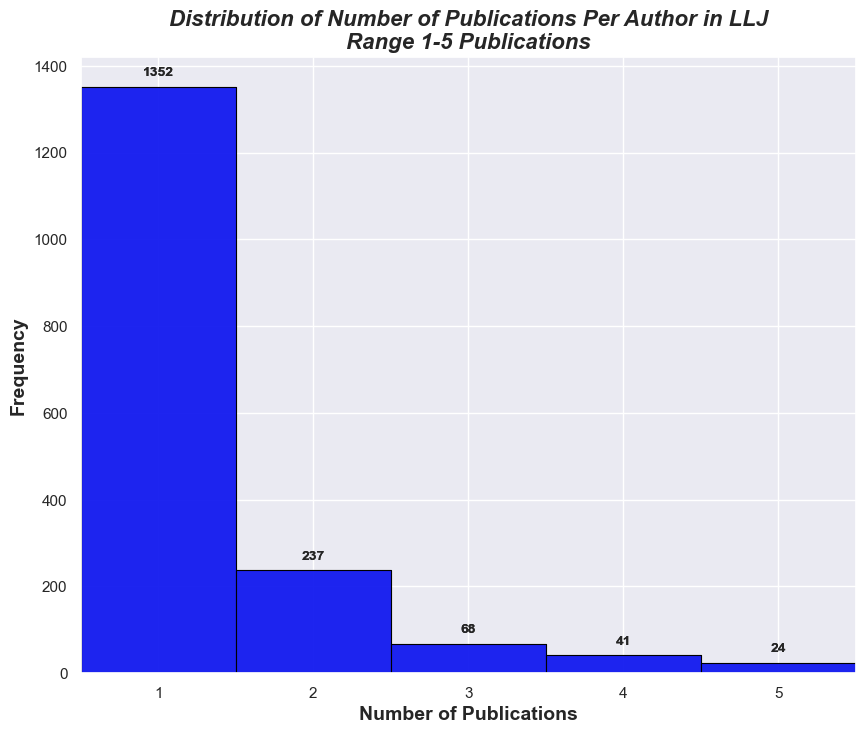

In [99]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
ax1 = sns.histplot(lljauthorcounts['Number of Publications'], bins=range(1, max(lljauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')

sns.histplot(lljauthorcounts['Number of Publications'], bins=range(1, max(lljauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black', color='blue')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in LLJ\nRange 1-5 Publications', fontsize = 16, fontweight = 'bold', style = 'italic')
plt.xlim(1, 6)
bin_centers = [i + 0.5 for i in range(1, 6)]
plt.xticks(bin_centers, range(1, 6))
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
#plt.savefig('distribution_publication_LLJHist1.png')
plt.show()

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


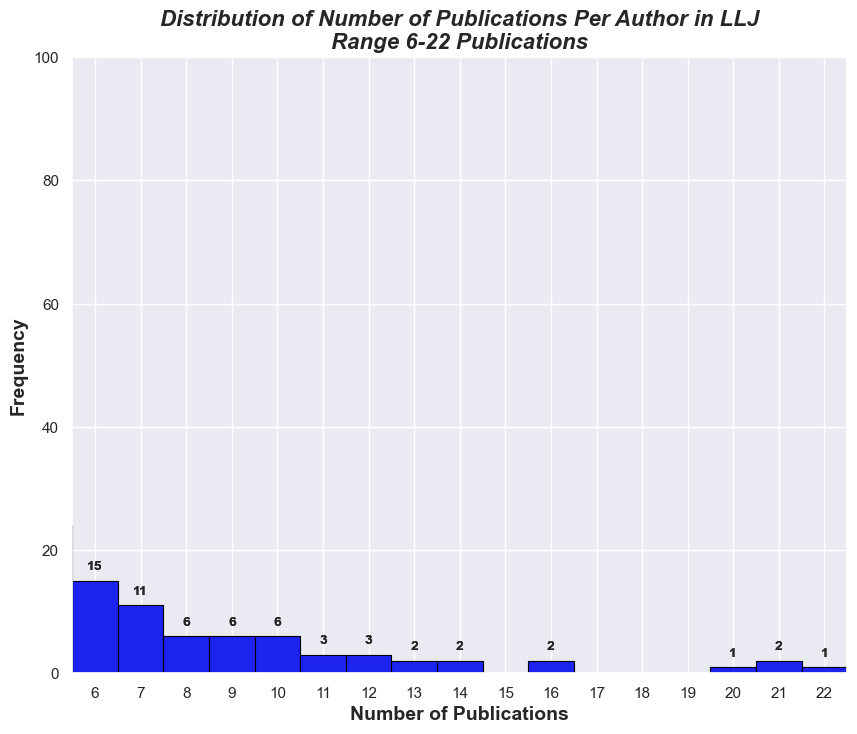

In [100]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
ax2 = sns.histplot(lljauthorcounts['Number of Publications'], bins=range(1, max(lljauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')

sns.histplot(lljauthorcounts['Number of Publications'], bins=range(1, max(lljauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black', color='blue')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in LLJ\nRange 6-22 Publications', fontsize = 16, fontweight = 'bold', style = 'italic')
plt.xlim(6, 23)
plt.ylim(0, 100)
bin_centers = [i + 0.5 for i in range(6, 23)]
plt.xticks(bin_centers, range(6, 23))
for p in ax2.patches:
    if p.get_height() > 0:
        ax2.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
#plt.savefig('distribution_publication_LLJHist2.png')
plt.show()

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


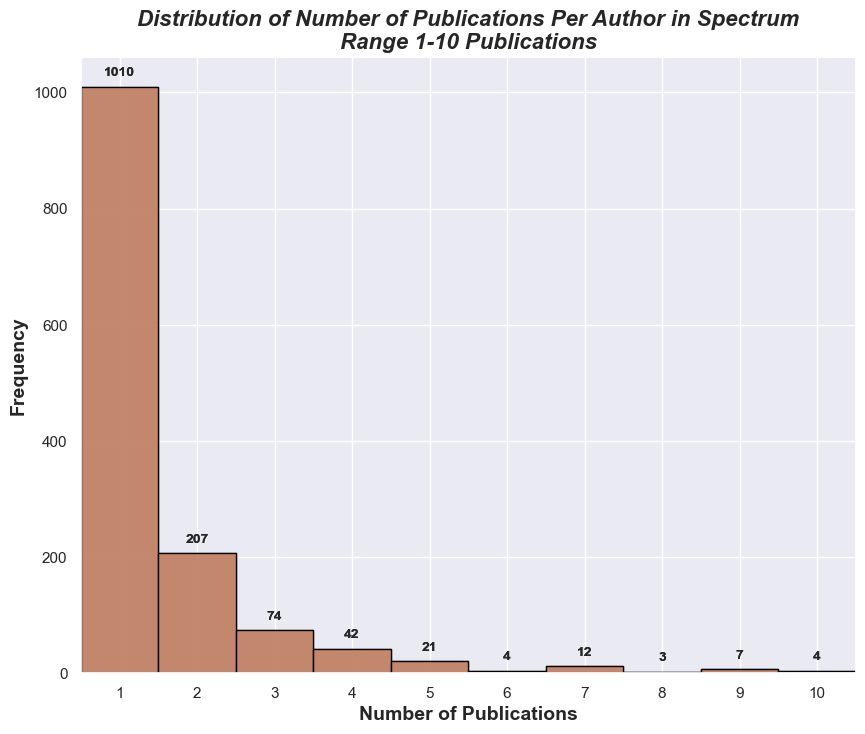

In [101]:

sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
ax3 = sns.histplot(specauthorcounts['Number of Publications'], bins=range(1, max(specauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')

sns.histplot(specauthorcounts['Number of Publications'], bins=range(1, max(specauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in Spectrum\nRange 1-10 Publications', fontsize=16, fontweight='bold', style='italic')
plt.xlim(1,11)
bin_centers = [i + 0.5 for i in range(1, 11)]
plt.xticks(bin_centers, range(1, 11))
for p in ax3.patches:
    if p.get_height() > 0:
        ax3.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
#plt.savefig('distribution_publication_SpectrumHist1.png')
plt.show()

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


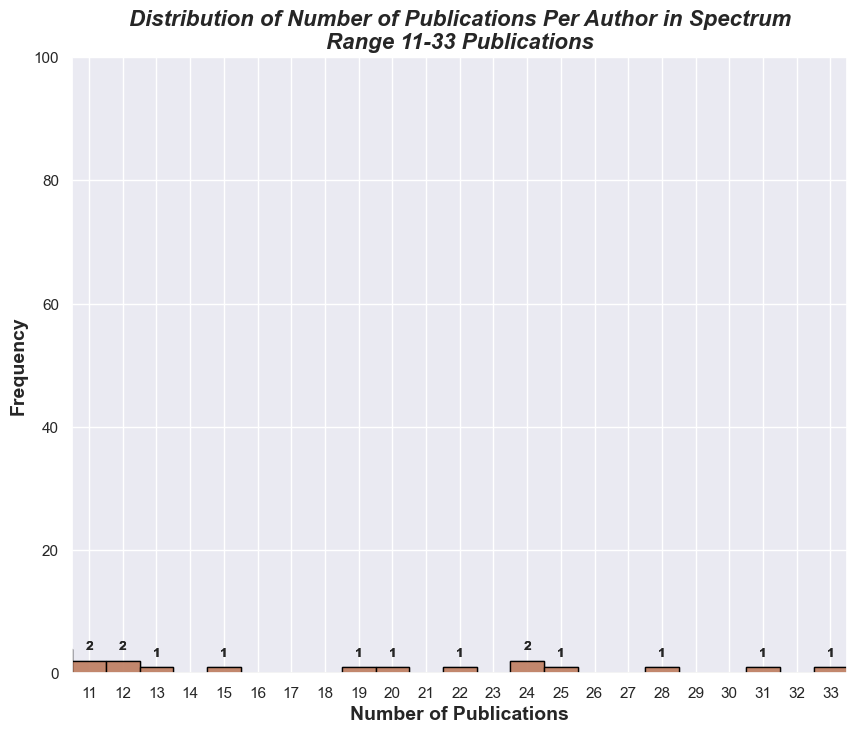

In [102]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
ax4 = sns.histplot(specauthorcounts['Number of Publications'], bins=range(1, max(specauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')

sns.histplot(specauthorcounts['Number of Publications'], bins=range(1, max(specauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in Spectrum\nRange 11-33 Publications', fontsize = 16, fontweight = 'bold', style = 'italic')
plt.xlim(11,34)
plt.ylim(0,100)
bin_centers = [i + 0.5 for i in range(11, 34)]
plt.xticks(bin_centers, range(11, 34))
for p in ax4.patches:
    if p.get_height() > 0:
        ax4.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
#plt.savefig('distribution_publication_SpectrumHist2.png')
plt.show()

In [103]:
dflljyear = dfllj[~(dfllj['Title'].isna() | dfllj['Author'].isna())]
dflljyear.reset_index(drop=True, inplace=True)

In [104]:
dflljyear.loc[:, 'Year'] = dflljyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))

/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/912630686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflljyear.loc[:, 'Year'] = dflljyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))


In [116]:
#dflljyear.to_csv('dflljyear.csv')

In [105]:
year_counts_llj = dflljyear['Year'].value_counts().sort_index()

In [106]:
dfspecyear = dfspec[~(dfspec['Title'].isna() | dfspec['Author'].isna())]
dfspec.reset_index(drop=True, inplace=True)

In [107]:
dfspecyear.loc[:, 'Year'] = dfspecyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))

/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/3206214432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfspecyear.loc[:, 'Year'] = dfspecyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))


In [115]:
#dfspecyear.to_csv('dfspecyear.csv')

In [108]:
year_counts_spec = dfspecyear['Year'].value_counts().sort_index()

Text(0, 0.5, 'Number of Publications')

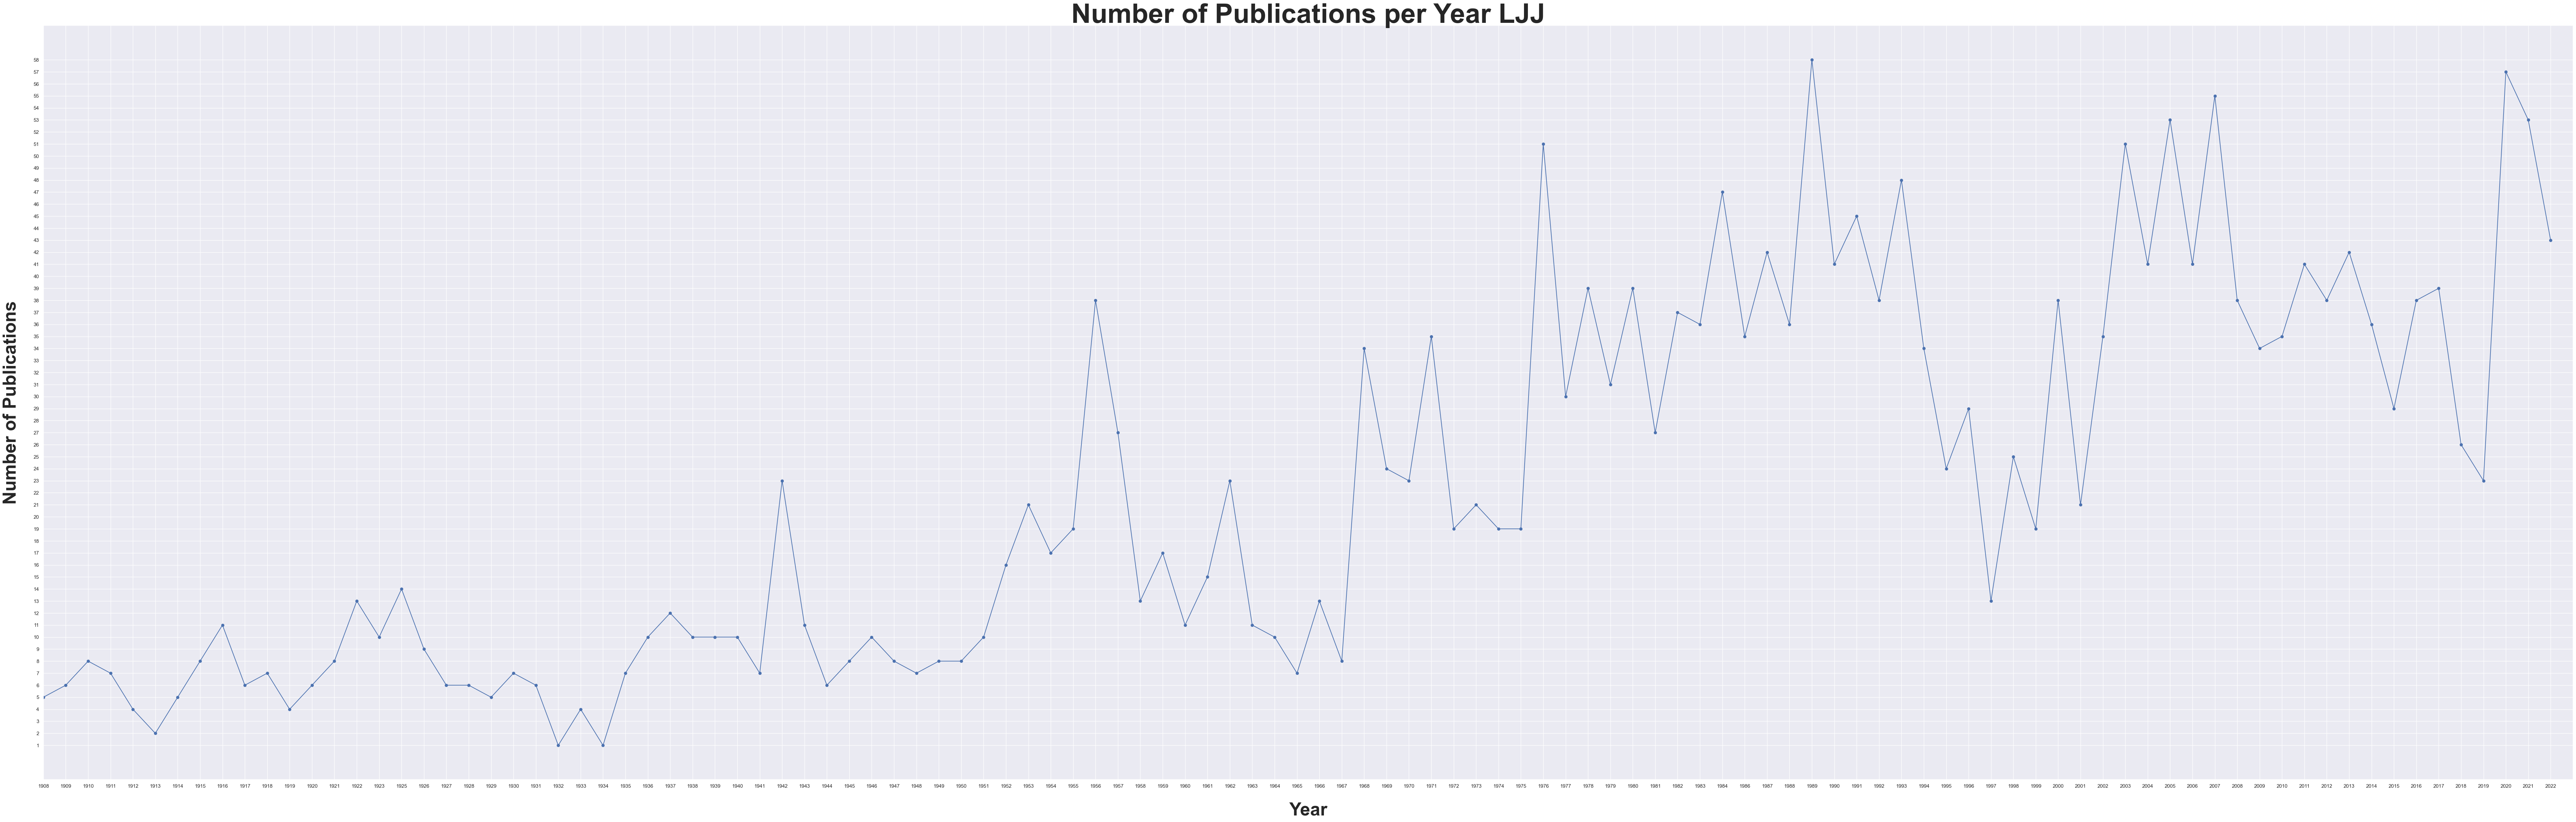

In [109]:
plt.figure(figsize=(100, 30))
plt.plot(year_counts_llj.index, year_counts_llj.values, marker='o', linestyle='-')
plt.xlim(left = 0, right = 113)
plt.yticks(range(min(year_counts_llj.values), max(year_counts_llj.values)+1, 1))
plt.title('Number of Publications per Year LJJ', fontsize=60, fontweight = 'bold')
plt.xlabel('Year', fontsize=40, fontweight = 'bold', labelpad=30)
plt.ylabel('Number of Publications', fontweight = 'bold', fontsize=40, labelpad=30)
# plt.savefig('LLJpublicationsperyear_plt.png')

Text(0, 0.5, 'Number of Publications')

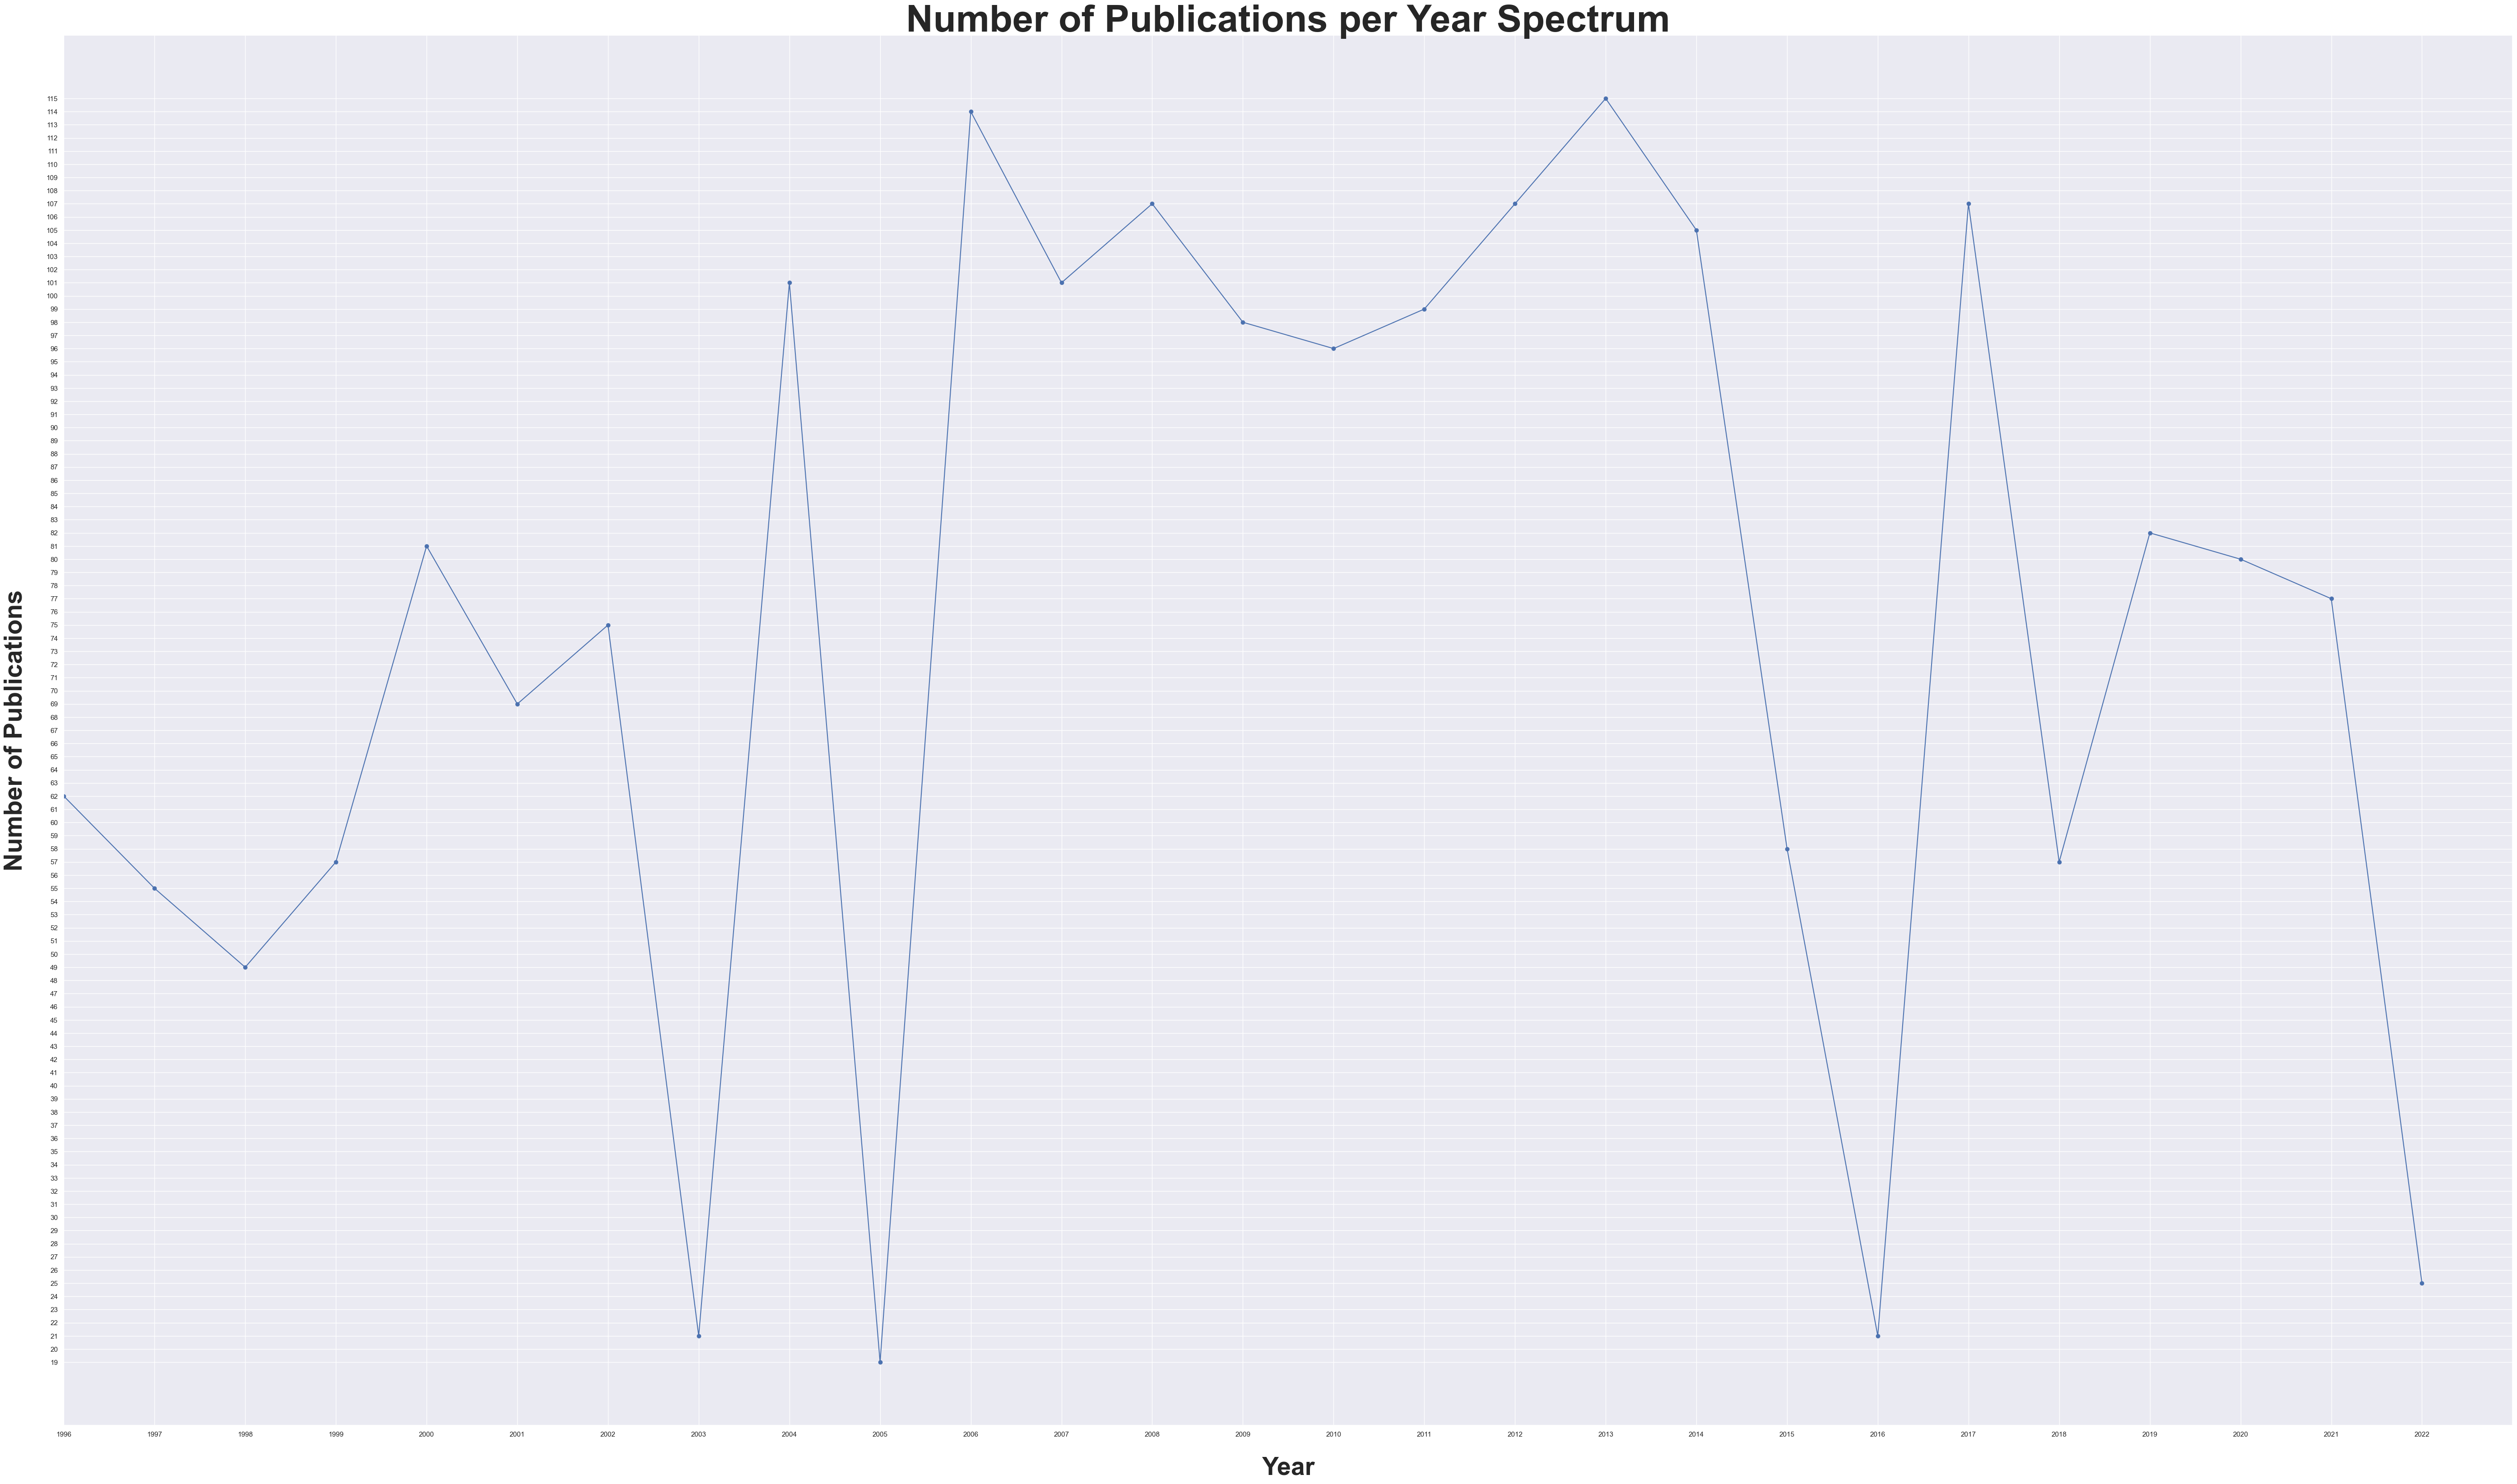

In [110]:
plt.figure(figsize=(70, 40))
plt.plot(year_counts_spec.index, year_counts_spec.values, marker='o', linestyle='-')
plt.xlim(left = 0, right = 27)
plt.yticks(range(min(year_counts_spec.values), max(year_counts_spec.values)+1, 1))
plt.title('Number of Publications per Year Spectrum', fontsize=60, fontweight = 'bold')
plt.xlabel('Year', fontsize=40, fontweight = 'bold', labelpad=30)
plt.ylabel('Number of Publications', fontweight = 'bold', fontsize=40, labelpad=30)
# plt.savefig('Spectrumpublicationsperyear_plt.png')

In [111]:
dflljyear['Title'] = dflljyear['Title'].astype(str)
embeddings = model.encode(dflljyear['Title'].tolist())
dflljyear['Embeddings'] = list(embeddings)

/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/999621502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflljyear['Title'] = dflljyear['Title'].astype(str)
/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/999621502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflljyear['Embeddings'] = list(embeddings)


In [120]:
num_clusters = 20
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
dflljyear['Clusters'] = agg_clustering.fit_predict(embeddings)


/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_16582/754231086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflljyear['Clusters'] = agg_clustering.fit_predict(embeddings)


In [122]:
Cluster1 = dflljyear[dflljyear['Clusters'] == 16][['Title']]
Cluster1.head(50)

,Title
41,Nursery of a Supreme Court Justice: The Librar...
83,Dissents from the Bench: A Compilation of Oral...
328,"Posner, Richard A. Divergent Paths: The Academ..."
375,Surprising Differences: An Empirical Analysis ...
395,Access to the Justices' Papers: A Better Balance
401,District Court Opinions That Remain Hidden Des...
445,Inconsistency and Indecision in the United Sta...
457,Justice in Plain Sight: How a Small-Town Newsp...
472,Tough Cases: Judges Tell the Stories of Some o...
483,Who Is to Judge?


In [128]:
clustererhdb = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clustererhdb.fit_predict(embeddings)
print(cluster_labels)
dflljyear.loc[:, 'Cluster'] = cluster_labels
def print_titles_by_cluster(dfllj):
    unique_clusters = dfllj['Cluster'].unique()
    for cluster in unique_clusters:
        titles_in_cluster = dfllj[dfllj['Cluster'] == cluster]['Title'].tolist()
        print(f"Titles in cluster {cluster}: {titles_in_cluster}")

# Usage example
print_titles_by_cluster(dflljyear)

[-1 -1 -1 ...  3  3 -1]
Titles in cluster -1: ['Address at a Joint Session with the American Library Association', 'Classification of Law Textbooks', 'Legislative Reference Work and the Law Library', 'Cataloguing Law Books with Special Reference to Cooperative Indexing and Index Cards', "Coke's Reports, and the Anonymous Commentary on Littleton", 'Some By-Products from Worcester County Law Library', 'Recent Developments in International and Municipal Law', 'The Need for College Instruction in the Use of Law Books', 'Law and Legislative Reference as Parts of a State Library', 'County Law Libraries and Their Services to the Community', 'From the Editor: A New Century', 'Preserving Our Heritage: Protecting Law Library Core Missions through Updated Library Quality Assessment Standards', 'Discovering William Cook: Ten Sources for Reconstructing the Life of a Lawyer', "Does Form Follow Function - Academic Law Libraries' Organizational Structures for Collection Development ", 'Choosing the To

In [114]:
#! Semantic analysis notes from cas
#sa refers to functions in the semantic analysis.py file
# 1. Creates embedings from a list of sentences
# df['Embeddings'] = sa.embed_divisions(df['CleanSeg'].tolist())
# 2. Identifies clusters and probabilities from the above embeddings
# df['Clusters'], df['Probabilities'] = sa.cluster_divisions(df['Embeddings'].tolist())
